In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

# 데이터 확인

In [2]:
os.listdir('../input/cat-and-dog/training_set')

['training_set']

In [3]:
os.getcwd()

'/kaggle/working'

In [4]:
cats_many = len(os.listdir('../input/cat-and-dog/training_set/training_set/cats'))
dogs_many = len(os.listdir('../input/cat-and-dog/training_set/training_set/dogs'))
print(f'cats: {cats_many}\ndogs: {dogs_many}')

cats: 4001
dogs: 4006


In [5]:
cats_test_many = len(os.listdir('../input/cat-and-dog/test_set/test_set/cats'))
dogs_test_many = len(os.listdir('../input/cat-and-dog/test_set/test_set/dogs'))
print(f'cats: {cats_test_many}\ndogs: {dogs_test_many}')

cats: 1012
dogs: 1013


In [6]:
train_data_path = '../input/cat-and-dog/training_set/training_set/'
class_names = ['cats','dogs']
class_names.index('cats')

train_data = []

for c in class_names:
    class_path = os.path.join(train_data_path,c)
    class_num = class_names.index(c)
    
    for img in tqdm(os.listdir(class_path)):
        img_array = cv2.imread(os.path.join(class_path,img),cv2.IMREAD_GRAYSCALE)
        
        train_data.append([img_array,class_num])

100%|██████████| 4006/4006 [00:47<00:00, 84.22it/s]


In [7]:
print(train_data[0][0].shape)
print(train_data[5000][0].shape)

(332, 500)
(363, 500)


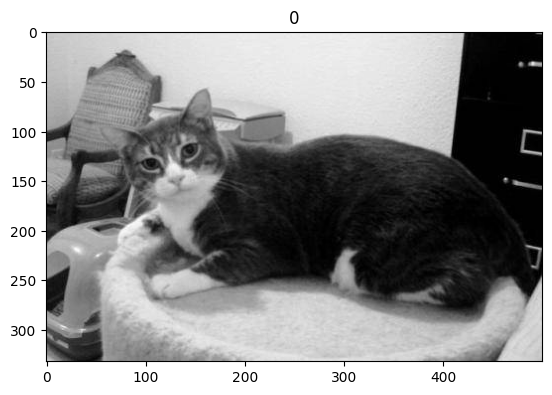

In [8]:
plt.imshow(train_data[0][0],cmap = 'gray')
plt.title(train_data[0][1])
plt.show()

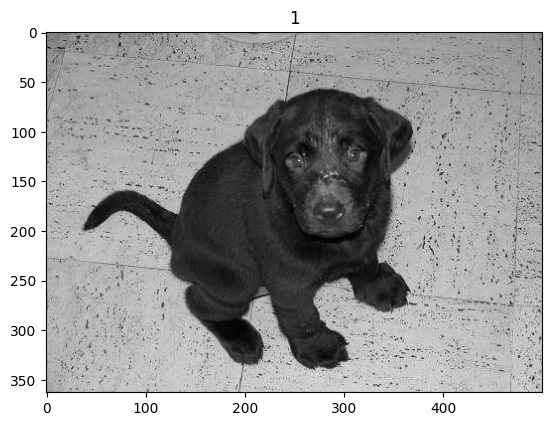

In [9]:
plt.imshow(train_data[5000][0],cmap='gray')
plt.title(train_data[5000][1])
plt.show()

# 데이터 자동 라벨링

데이터가 클래스별 폴더에 저장되어있을 경우 가능

In [10]:
# data path
main_path = '/kaggle/input/cat-and-dog'
train_path = '/training_set/training_set/'
test_path = '/test_set/test_set/'

In [11]:
train_dataset = datasets.ImageFolder(root=main_path+train_path)
test_dataset = datasets.ImageFolder(root=main_path+test_path)

In [12]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 8005
    Root location: /kaggle/input/cat-and-dog/training_set/training_set/

In [13]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 2023
    Root location: /kaggle/input/cat-and-dog/test_set/test_set/

In [14]:
train_dataset.class_to_idx

{'cats': 0, 'dogs': 1}

In [15]:
test_dataset.class_to_idx

{'cats': 0, 'dogs': 1}

In [16]:
train_dataloaders = torch.utils.data.DataLoader(train_dataset, batch_size = 4, shuffle = True, num_workers = 2)
train_datatset_size = len(train_dataset)
class_names = train_dataset.classes